In [1]:
##General
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.colors import LinearSegmentedColormap

##Sklearn general
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.base import clone
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##Models
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

c:\Users\arash\Anaconda3\envs\courses\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
def plotWavelength(sample,n,ax=None,cbar=True):
    '''
    Plot image at a given wavelength.

    Parameters
    ----------
    sample : numpy array
        multispectral image
    
    n : int
        nb of wavelength to show
        
     ax : matplotlib.axes._subplots.AxesSubplot, default=None
        add the plot to an existing axis
        
    cbar : bool
        wether to display colorbar or not

    Returns
    -------
    None

    '''
    if ax is None:
        ax=plt.gca()
    wave=sample[:,:,n]
    img=ax.imshow(wave,aspect='auto',cmap='Greys')
    if cbar:
        plt.colorbar(img)
    ax.set(title=f"{n}th wavelength")

def plotSpectra(wvgood, sample=None,row=None,col=None,ax=None,wavelength=None,color=None,**plt_kwargs):
    '''
    Plot pixel's spectra.

    Parameters
    ----------
    wvgood : numpy array
        values of the wavelengths
    
    sample : numpy array
        multispectral image
    
    row, col : int 
        row and column of the pixel
        
    wavelength : numpy array
        give directly the wavelength spectra array, instead of wvgood and sample
        
    **plt_kwargs : matplotlib plot arguments
     
    Returns
    -------
    None

    '''
    if ax is None:
        ax=plt.gca()
    if wavelength is not None:
        ax.plot(wvgood.flatten(),wavelength,**plt_kwargs)
    else:
        spectra=sample[row,col,:]
        ax.plot(wvgood.flatten(),spectra,color=color,**plt_kwargs)
        ax.set(xlabel="Wavelength (nm)",ylabel="Value",title=f"Spectra pixel ({row},{col})")
    
def imshow(f):
    '''
    Custom imshow.

    Parameters
    ----------
    f : array
     
    Returns
    -------
    None

    '''
    plt.figure()
    plt.imshow(f,cmap='gray',aspect='auto')

In [3]:
matdata = loadmat('./data/hyperspectraldata.mat')
nH=matdata["nH"][0][0]
nV=matdata["nV"][0][0]
sample=matdata["sample"]
wvgood=matdata["wvgood"]

In [4]:
print("Each image is", sample.shape)

Each image is (203, 117, 142)


# Data Exploration

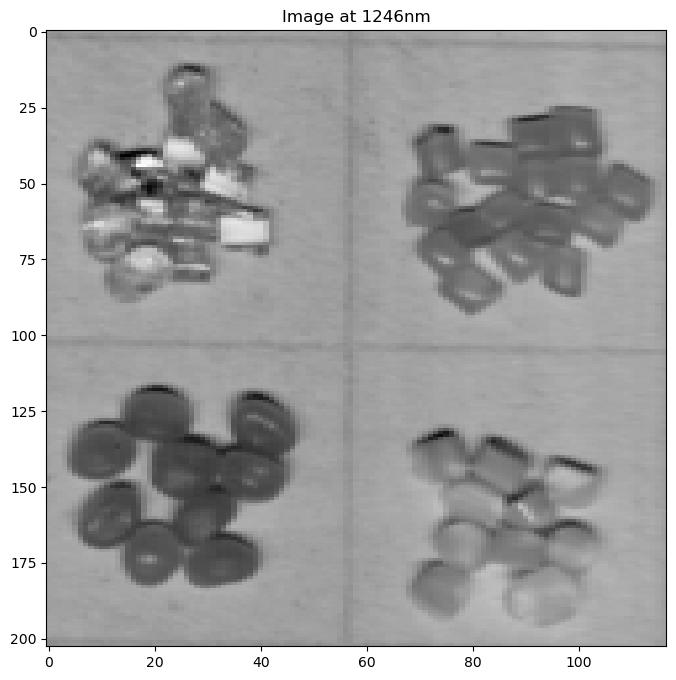

In [5]:
fig,ax1=plt.subplots(figsize=(8,8))
plotWavelength(sample,49,ax=ax1,cbar=False)
ax1.set(title=f"Image at {str(wvgood[49][0])[:4]}nm");

In [6]:
print("Number of distinct wavelengths at which the measurements are taken", )

Number of distinct wavelengths at which the measurements are taken


(203, 117, 142)


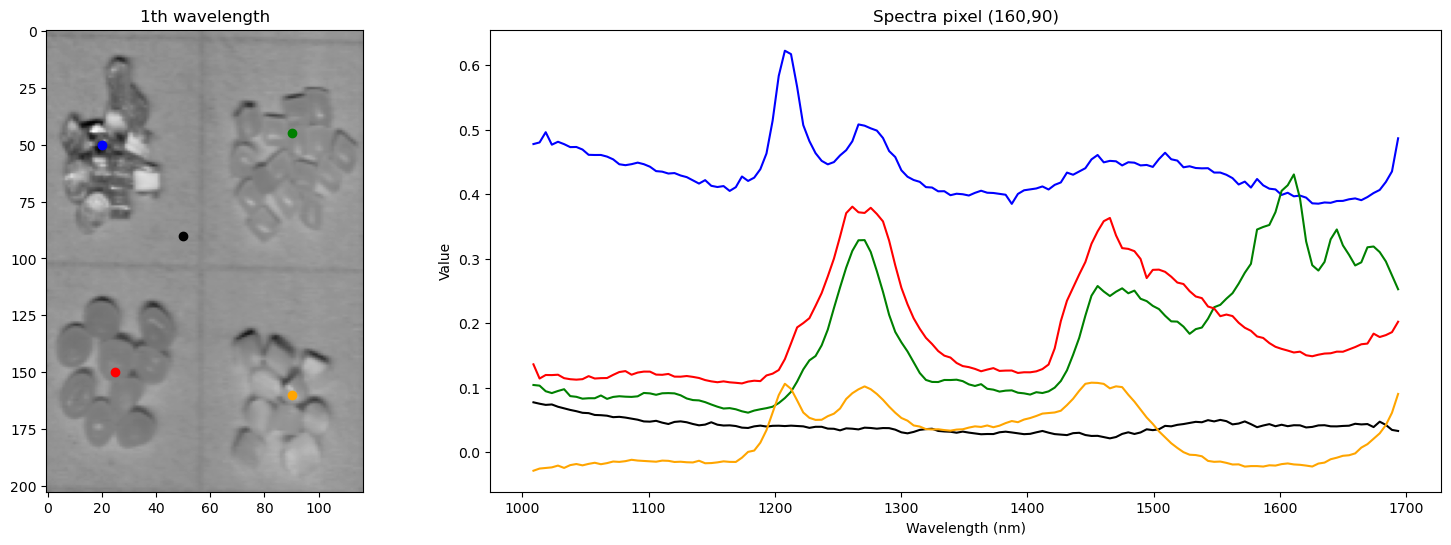

In [7]:
row1,col1=90,50
row2,col2=50,20
row3,col3=45,90
row4,col4=150,25
row5,col5=160,90

fig,[ax1,ax2]=plt.subplots(1,2,figsize=(18,6),gridspec_kw={'width_ratios': [1, 3]})
plotWavelength(sample,1,ax=ax1,cbar=False)
ax1.scatter(col1,row1,color='black')
ax1.scatter(col2,row2,color='blue')
ax1.scatter(col3,row3,color='green')
ax1.scatter(col4,row4,color='red')
ax1.scatter(col5,row5,color='orange')
print(sample.shape)
plotSpectra(wvgood,sample,row1,col1,ax=ax2,color='black')
plotSpectra(wvgood,sample,row2,col2,ax=ax2,color='blue')
plotSpectra(wvgood,sample,row3,col3,ax=ax2,color='green')
plotSpectra(wvgood,sample,row4,col4,ax=ax2,color='red')
plotSpectra(wvgood,sample,row5,col5,ax=ax2,color='orange')

(203, 117, 142)


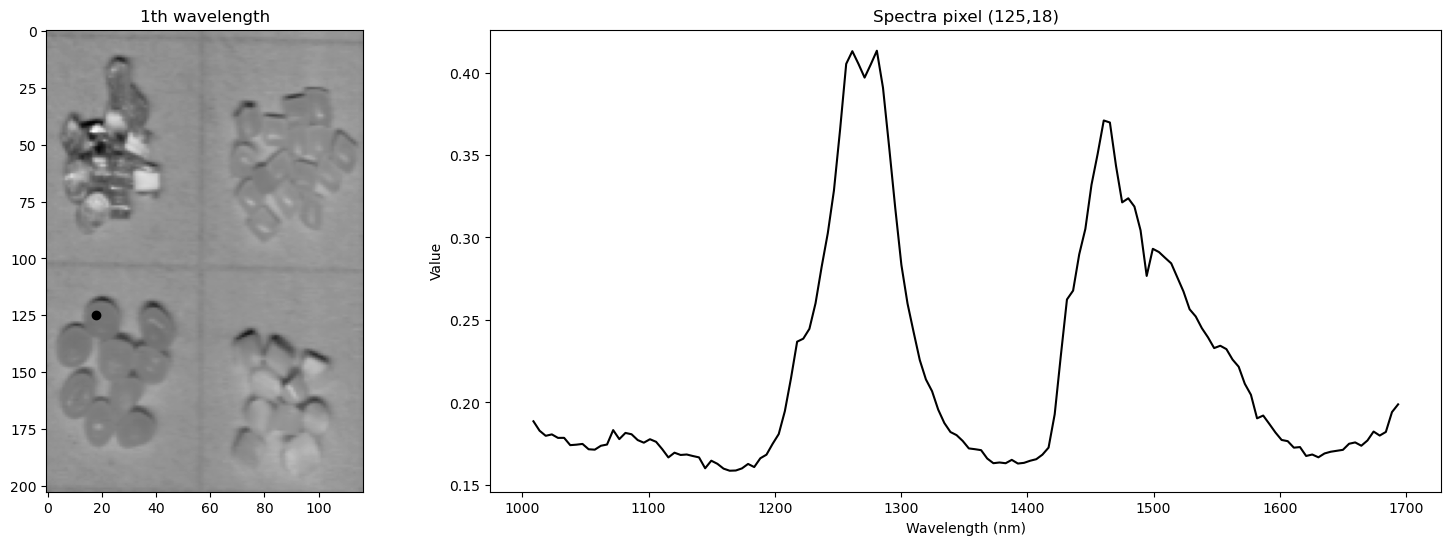

In [8]:
newrow=125
newcol=18
fig,[ax1,ax2]=plt.subplots(1,2,figsize=(18,6),gridspec_kw={'width_ratios': [1, 3]})
plotWavelength(sample,1,ax=ax1,cbar=False)
ax1.scatter(newcol,newrow,color='black')

print(sample.shape)
plotSpectra(wvgood,sample,newrow,newcol,ax=ax2,color='black')

(203, 117, 142)


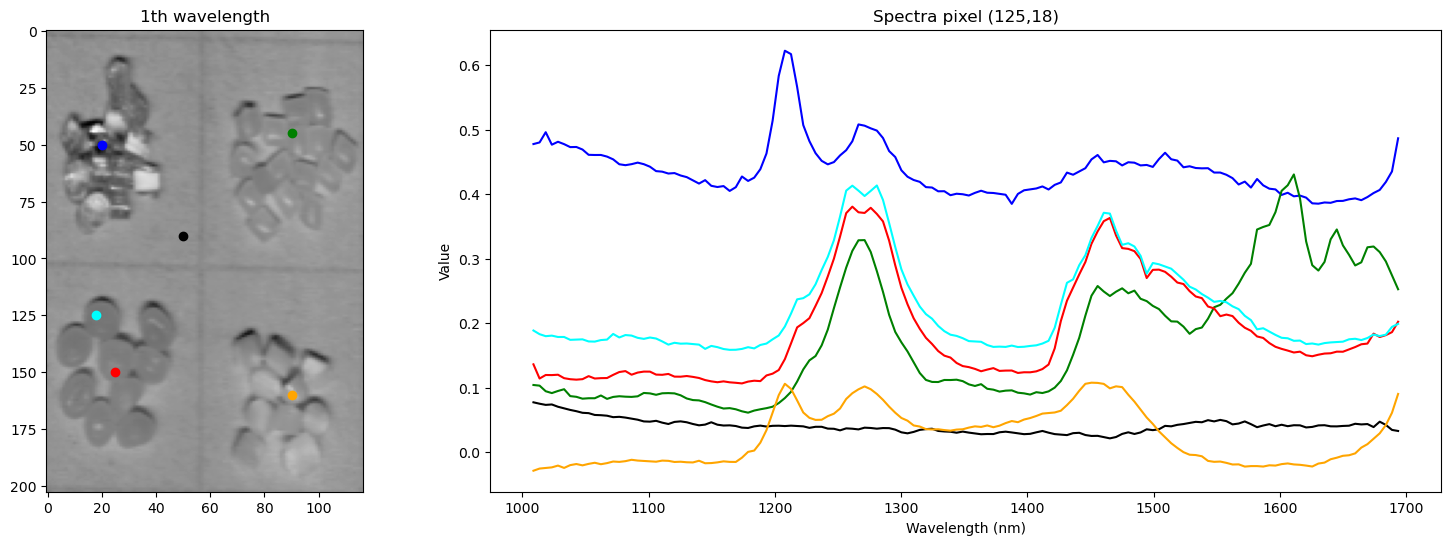

In [9]:
row1,col1=90,50
row2,col2=50,20
row3,col3=45,90
row4,col4=150,25
row5,col5=160,90
newrow=125
newcol=18

fig,[ax1,ax2]=plt.subplots(1,2,figsize=(18,6),gridspec_kw={'width_ratios': [1, 3]})
plotWavelength(sample,1,ax=ax1,cbar=False)
ax1.scatter(col1,row1,color='black')
ax1.scatter(col2,row2,color='blue')
ax1.scatter(col3,row3,color='green')
ax1.scatter(col4,row4,color='red')
ax1.scatter(col5,row5,color='orange')
ax1.scatter(newcol,newrow,color='cyan')
print(sample.shape)
plotSpectra(wvgood,sample,row1,col1,ax=ax2,color='black')
plotSpectra(wvgood,sample,row2,col2,ax=ax2,color='blue')
plotSpectra(wvgood,sample,row3,col3,ax=ax2,color='green')
plotSpectra(wvgood,sample,row4,col4,ax=ax2,color='red')
plotSpectra(wvgood,sample,row5,col5,ax=ax2,color='orange')
plotSpectra(wvgood,sample,newrow,newcol,ax=ax2,color='cyan')